<a href="https://colab.research.google.com/github/Sharath198118/White-Blood-Cancer/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/Data/ALL')))
print(len(os.listdir('/content/drive/MyDrive/Data/MM')))

190
214


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D , MaxPool2D , Flatten , Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Sequential, load_model
import random
import shutil
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
os.mkdir("main_data")
os.mkdir('main_data/train')
os.mkdir("main_data/test")
os.mkdir('main_data/val')

In [ ]:
os.mkdir('main_data/train/ALL')
os.mkdir('main_data/train/MM')
os.mkdir('main_data/test/ALL')
os.mkdir('main_data/test/MM')
os.mkdir('main_data/val/ALL')
os.mkdir('main_data/val/MM')

In [ ]:
from glob import glob  #glob (short for global) is used to return all file paths that match a specific pattern.

In [ ]:
files_1=['ALL']
files_2=['MM']

In [ ]:
for f in files_1:
  f_names_1 = '/content/drive/MyDrive/Data/' + f + '/*.jpg'
  print(f_names_1)
  f_names_1 = glob(f_names_1)
  total_samples_1 = len(f_names_1)

  print(total_samples_1)

/content/drive/MyDrive/Data/ALL/*.jpg
190


In [ ]:
for f in files_2:
  f_names_2 = '/content/drive/MyDrive/Data/' + f + '/*.jpg'
  print(f_names_2)
  f_names_2 = glob(f_names_2)
  total_samples_2 = len(f_names_2)

  print(total_samples_2)

/content/drive/MyDrive/Data/MM/*.jpg
214


In [ ]:
for f in files_1:

  train_sam_1, test_sam_1, val_sam_1 = total_samples_1 * 0.70, total_samples_1 * 0.15, total_samples_1 * 0.15

  train_sam_1, test_sam_1, val_sam_1 =  f_names_1[0: int(train_sam_1)] , f_names_1[int(train_sam_1): int(train_sam_1) + int(test_sam_1)], f_names_1[ int(train_sam_1) + int(test_sam_1):  int(train_sam_1) + (2 *int(test_sam_1))]

In [ ]:
for f in files_2:

  train_sam_2, test_sam_2, val_sam_2 = total_samples_2 * 0.70, total_samples_2 * 0.15, total_samples_2 * 0.15

  train_sam_2, test_sam_2, val_sam_2 =  f_names_2[0: int(train_sam_2)] , f_names_2[int(train_sam_2): int(train_sam_2) + int(test_sam_2)], f_names_2[ int(train_sam_2) + int(test_sam_2):  int(train_sam_2) + (2 *int(test_sam_2))]
  

In [ ]:
a=len(train_sam_1)
print(a)
b=len(test_sam_1)
print(b)
c=len(val_sam_1)
print(c)

133
28
28


In [ ]:
d=len(train_sam_2)
print(d)
e=len(test_sam_2)
print(e)
f=len(val_sam_2)
print(f)

149
32
32


In [ ]:
destination_dir_train_1='/content/main_data/train/ALL'
destination_dir_test_1='/content/main_data/test/ALL'
destination_dir_val_1='/content/main_data/val/ALL'

In [ ]:
destination_dir_train_2='/content/main_data/train/MM'
destination_dir_test_2='/content/main_data/test/MM'
destination_dir_val_2='/content/main_data/val/MM'

In [ ]:
for i in range(a):
  current_1=train_sam_1[i]
  shutil.copy(current_1,destination_dir_train_1)
for i in range(b):
  current_2=test_sam_1[i]
  shutil.copy(current_2,destination_dir_test_1)
for i in range(c):
  current_3=val_sam_1[i]
  shutil.copy(current_3,destination_dir_val_1)

In [ ]:
for i in range(d):
  current_4=train_sam_2[i]
  shutil.copy(current_4,destination_dir_train_2)
for i in range(e):
  current_5=test_sam_2[i]
  shutil.copy(current_5,destination_dir_test_2)
for i in range(f):
  current_6=val_sam_2[i]
  shutil.copy(current_6,destination_dir_val_2)

In [ ]:
print(len(os.listdir(destination_dir_train_1)))
print(len(os.listdir(destination_dir_test_1)))
print(len(os.listdir(destination_dir_val_1)))

133
28
28


In [ ]:
print(len(os.listdir(destination_dir_train_2)))
print(len(os.listdir(destination_dir_test_2)))
print(len(os.listdir(destination_dir_val_2)))

149
32
32


In [ ]:
import tensorflow.keras as K

In [ ]:
input_image_shape=(224,224,3)
train_batch_size=32

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt


Categories=["ALL","MM"]
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/Data/'

#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    
    for img in os.listdir(path):
        
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
        
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output datas.index(i))


loading... category : ALL
loaded category:ALL successfully
loading... category : MM
loaded category:MM successfully


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
model=SelectKBest(score_func=chi2, k=4)
fit=model.fit(x,y)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(rescale=1./255,
                                        height_shift_range=0,
                                        width_shift_range=0,
                                        horizontal_flip=True,
                                        zoom_range=0,
                                        fill_mode="nearest")


val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/main_data/train',
        target_size=input_image_shape[:2],
        color_mode="rgb",
        batch_size=train_batch_size,
        class_mode='categorical',
        shuffle=True,
        seed=42)

    # batch_size for validation and test generator should perfectly divide the total number of examples
validation_generator = val_datagen.flow_from_directory(
        '/content/main_data/val',
        target_size=input_image_shape[:2],
        color_mode="rgb",
        batch_size=100,
        class_mode='categorical',
        shuffle=True,
        seed=42)

test_generator = test_datagen.flow_from_directory(
        '/content/main_data/test',
        target_size=input_image_shape[:2],
        color_mode="rgb",
        batch_size=100,
        class_mode='categorical',
        shuffle=False,
        seed=42)
    

Found 282 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
import tensorflow as tf

from tensorflow.keras import layers

x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='sigmoid')(x)

modelv16 = tf.keras.models.Model(base_model.input, x)

modelv16.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc',])
modelv16.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
TRAIN_STEP_SIZE = train_generator.n//train_generator.batch_size
VALIDATION_STEP_SIZE = validation_generator.n//validation_generator.batch_size

In [ ]:
 # Early Stopping callback
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=0, mode='min')

  # To save the model with best validation accuracy
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=0, save_best_only=True)

In [ ]:
history = modelv16.fit(train_generator,
                    steps_per_epoch = TRAIN_STEP_SIZE,
                    validation_data = validation_generator,
                    validation_steps = VALIDATION_STEP_SIZE,
                    epochs=5, 
                    callbacks=[earlyStopping, mc],
                    verbose=2)

Epoch 1/5
8/8 - 145s - loss: 1.5868 - acc: 0.6172 - 145s/epoch - 18s/step
Epoch 2/5
8/8 - 133s - loss: 1.8716 - acc: 0.6200 - 133s/epoch - 17s/step
Epoch 3/5
8/8 - 138s - loss: 0.9097 - acc: 0.6960 - 138s/epoch - 17s/step
Epoch 4/5
8/8 - 133s - loss: 0.6366 - acc: 0.7360 - 133s/epoch - 17s/step
Epoch 5/5
8/8 - 138s - loss: 0.5740 - acc: 0.7617 - 138s/epoch - 17s/step


In [ ]:
pre_train_model = "Xception"#change here to change model for wandb sweeps
activation_function_dense = "relu"#set as default

In [ ]:
pr=modelv16.evaluate(test_generator)

1/1 [==============================] - 35s 35s/step - loss: 0.0428 - acc: 0.9833


In [ ]:
print(pr)

[0.042791493237018585, 0.9833333492279053]


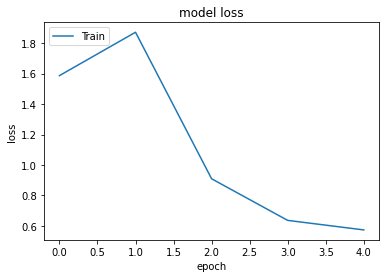

In [ ]:
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

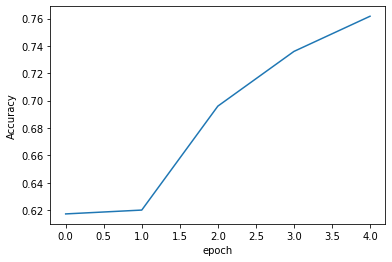

In [ ]:
plt.plot(history.history['acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()